# Interest Rates vs. Income Range, Credit Score and Prosper Rating
## by Iman Babaei

## Investigation Overview

> In the coming slides, I will show my exploration findings:
* Interest rate changes through years for different income ranges.
* Interest rate for different Prosper ratings categories
* Change of interest rate vs Prosper ratings and with regard to the credit score

## Dataset Overview

> The original data set contained 113,937 loans with 81 variables on each loan from 2005 to 2014. To investigate the aspects affecting the APR I chose 17 numerical and categorical variables like loan amount, borrower rate, current loan status, borrower income, and etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# I have imported the data set that I saved at the end of the exploration part.
df_loan = pd.read_csv('Loan.csv')

# I clean the columns for better visualizations
#put Ratings in order
order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_loan.ProsperRating = df_loan.ProsperRating.astype(ordered)

#To make IncomeRange an ordered categorical column
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',\
         '$75,000-99,999', '$100,000+', 'Not displayed']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_loan.IncomeRange = df_loan.IncomeRange.astype(ordered)

# To make EmploymentStatus an orderred and categorical column
order = ['Employed','Not employed','Self-employed','Full-time','Part-time','Retired','Other', 'Not available']
ordered= pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_loan.EmploymentStatus = df_loan.EmploymentStatus.astype(ordered)

#Making Homeowner Status a categorical Yes No columns
df_loan.IsBorrowerHomeowner = df_loan.IsBorrowerHomeowner.astype('category')

#Make the data a datetime format
df_loan.LoanOriginationDate = pd.to_datetime(df_loan.LoanOriginationDate)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Interest Rate Through Years for Different Income Range Groups  

Interest rates change through years for all of the income range groups. But, for the higher income ranges the interest rates are lower always and the ironically the gap between the interest rates for different groups has increased in the past years! 

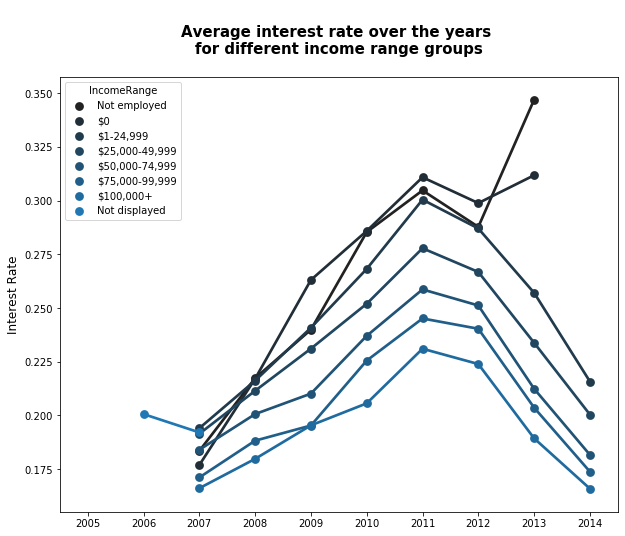

In [3]:
## plots the pointplot for year vs BorrowerRate and weather they have house or no.
plt.figure(figsize = [10,8])
base_color = sb.color_palette()[0]
sb.pointplot(data=df_loan, x=df_loan.LoanOriginationDate.dt.year, y="BorrowerAPR", hue="IncomeRange",\
             ci = None, color = base_color);
plt.title('\nAverage interest rate over the years \nfor different income range groups\n',weight='bold', fontsize=15);
plt.ylabel('Interest Rate', fontsize=12);
plt.xlabel('');

* For further understanding of the Income Range effect, the number of loans for each Income Range during past years was plotted as well.

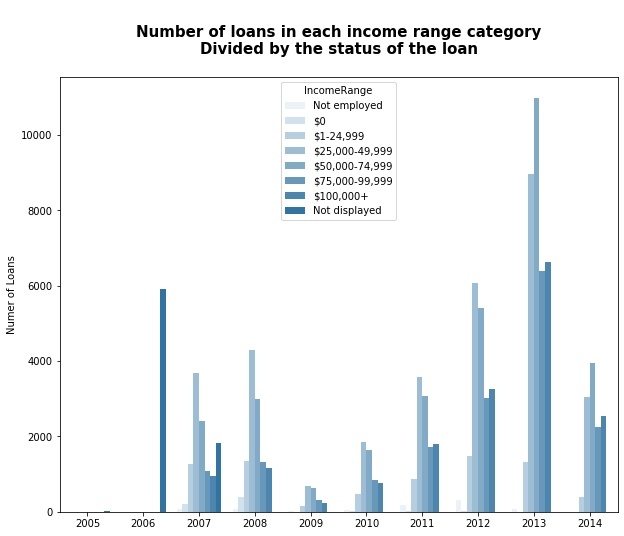

In [4]:
# Number of house owners in each group of Income range. 
plt.figure(figsize = [10,8])
sb.countplot(data = df_loan, x = df_loan.LoanOriginationDate.dt.year, hue='IncomeRange', color = base_color);
plt.title('\nNumber of loans in each income range category\nDivided by the status of the loan\n', weight='bold', fontsize = 15);
plt.ylabel('Numer of Loans');
plt.xlabel('');

## Interest Rate for Different Prosper Ratings

The better the prosper rating, the lower the interest rate that they pay. The violin plot proved it that the better rated categories pay up to one third lower rates. 

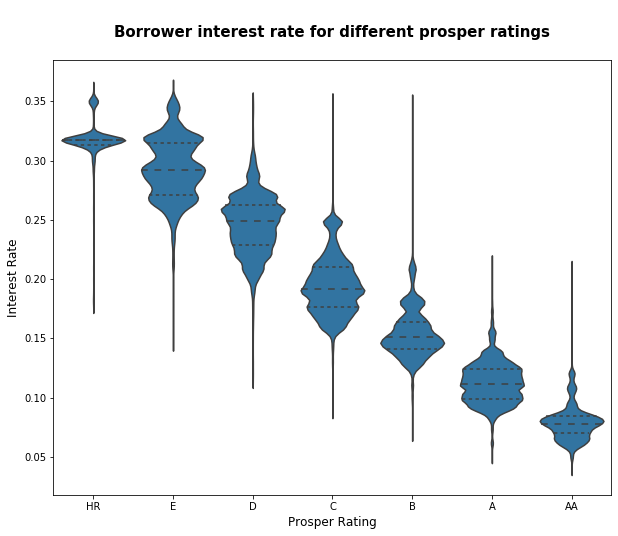

In [5]:
plt.figure(figsize = [10,8])
sb.violinplot(df_loan.ProsperRating,df_loan.BorrowerRate, color = base_color, inner = 'quartile', scale = 'width');
plt.title('\nBorrower interest rate for different prosper ratings\n',weight = 'bold', fontsize = 15);
plt.ylabel('Interest Rate',  fontsize = 12);
plt.xlabel('Prosper Rating',  fontsize = 12);


## Interest Rate vs Prosper Ratings & Credit Score

The following graph shows the scatter plot of loans at different Proper rating groups. The graph is colormapped with respect to the credit score upper range.

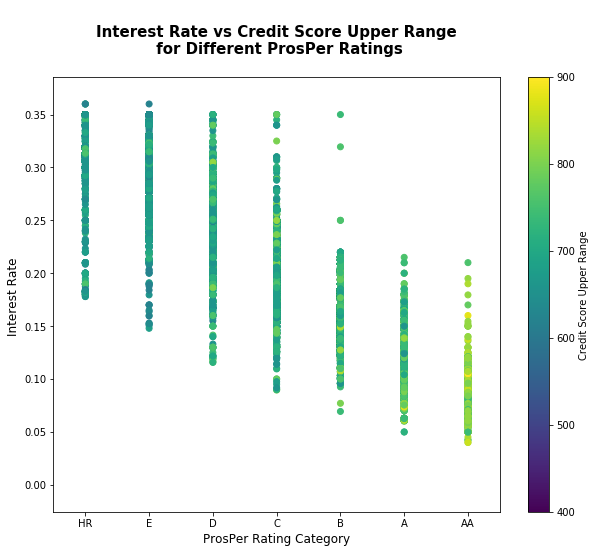

In [6]:
plt.figure(figsize = [10,8])
plt.scatter(data = df_loan, x = df_loan.ProsperRating.cat.codes , y = 'BorrowerRate', c = 'CreditScoreRangeUpper')
plt.clim(400,900)
plt.colorbar(label = 'Credit Score Upper Range')
plt.xlim((-.5, 6.5))
plt.ylabel('Interest Rate ',fontsize=12)
plt.xlabel('ProsPer Rating Category',fontsize=12)
plt.title('\nInterest Rate vs Credit Score Upper Range\n for Different ProsPer Ratings\n',weight = 'bold', fontsize=15);
x = np.arange(0,7,1)
plt.xticks(x ,df_loan.ProsperRating.cat.categories.tolist());

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!